# Mapas en México

Aquí, vamos a construir un mapa de la Republica Mexicana usando Python, en particular la librería `geopandas`.

Primero vamos a descargar el mapa de México, este se encuentra en el siguiente archivo. 



In [103]:
import zipfile
import os

mexico_data = "..\\medium_data\\mexico_data"
zlist = os.listdir(mexico_data)

Ahora crearemos una carpeta para guardar los datos.

In [104]:
folder_path = mexico_data + '\\Mexico'
try:
    os.mkdir(mexico_data + '\\Mexico')
except:
    print('Hubo un detalle')

Hubo un detalle


In [105]:
mg_zip = mexico_data + "\\mg_2023_integrado.zip"

with zipfile.ZipFile(mg_zip, 'r') as cvegeo:
    cvegeo.extractall(folder_path)

mg_path = mexico_data + "\\Mexico\\conjunto_de_datos"

mg_list = os.listdir(mg_path)
mg_list

['00a.cpg',
 '00a.dbf',
 '00a.prj',
 '00a.shp',
 '00a.shx',
 '00ent.cpg',
 '00ent.dbf',
 '00ent.prj',
 '00ent.shp',
 '00ent.shx',
 '00l.cpg',
 '00l.dbf',
 '00l.prj',
 '00l.shp',
 '00l.shx',
 '00lpr.cpg',
 '00lpr.dbf',
 '00lpr.prj',
 '00lpr.shp',
 '00lpr.shx',
 '00mun.cpg',
 '00mun.dbf',
 '00mun.prj',
 '00mun.shp',
 '00mun.shx']

In [106]:
import fiona

geo_path_base = "..\\medium_data\\mexico_data\\Mexico\\conjunto_de_datos"
geo_paths = []
for file in mg_list:
    if file.endswith(".shp"):
        geo_paths.append(os.path.join(geo_path_base, file))


In [107]:
import geopandas as gpd

def cvegeo(shape):
    municipies = fiona.open(shape)
    df = gpd.GeoDataFrame.from_features([feature for feature in municipies])
    # Get the order of the fields in the Fiona Collection; add geometry to the end
    columns = list(municipies.meta["schema"]["properties"]) + ["geometry"]
    # Re-order columns in the correct order
    df = df[columns]
    return df

mexico_cvegeo = cvegeo(geo_paths[1])


Ahora visualizamos el dataframe.

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

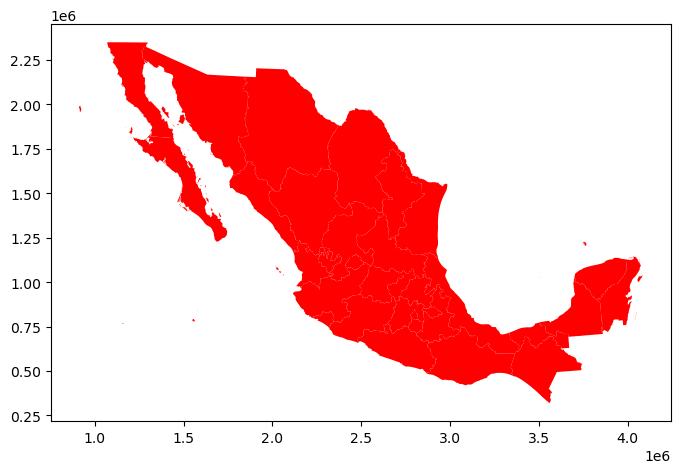

In [108]:
mexico_cvegeo.plot(figsize = (8,8), color = 'red')

# color: definir un color del mapa. 

Notemos ahora, que si colocamos información, podemos graficar segun el valor.


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

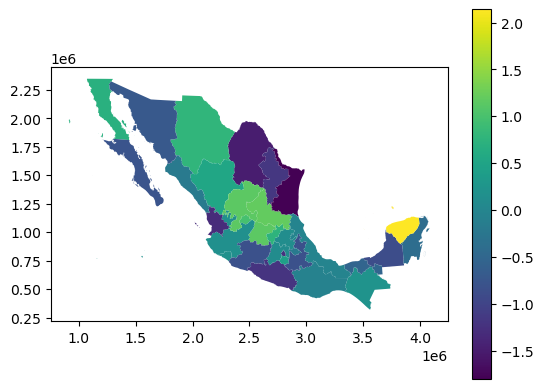

In [109]:
import numpy as np
import matplotlib.pyplot as plt

mexico = mexico_cvegeo.copy()
mexico['C1'] = np.random.standard_normal(size = len(mexico.index))

mexico.plot('C1', legend = True)

A partir de aqui, iremos avanzando para darle la forma que necesitmos. Primero, los colores. 

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


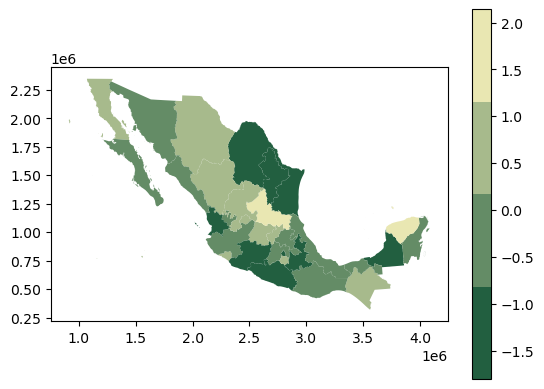

In [110]:
from matplotlib.colors import ListedColormap
import gradient as gc


article_colors = {
    'rojo' : "#C20000",
    'cafe' : "#C67F19",
    'amarillo' : "#F6C733",
    'vainilla' : "#E9E7B2"
}


color_gradient_limits = ["#225F40","#E9E7B2"]


def new_cmap(colors: dict):
    return ListedColormap(list(colors.values()))

def gradient_cmap(col_limits, n_colors):
     return ListedColormap(gc.get_color_gradient(col_limits[0],col_limits[1], n_colors))


mexico.plot('C1', legend = True, cmap = gradient_cmap(color_gradient_limits, 4))

cmap_revista = gradient_cmap(color_gradient_limits, 4)

Ahora, agregaremos los nombres de los estados.

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


0     Annotation(2.46281e+06, 1.10987e+06, 'Aguascal...
1     Annotation(1.24376e+06, 2.11025e+06, 'Baja Cal...
2     Annotation(1.50116e+06, 1.57513e+06, 'Baja Cal...
3           Annotation(3.72258e+06, 810060, 'Campeche')
4     Annotation(2.49563e+06, 1.69195e+06, 'Coahuila...
5             Annotation(2.27793e+06, 794913, 'Colima')
6            Annotation(3.51849e+06, 533627, 'Chiapas')
7      Annotation(2.0648e+06, 1.86622e+06, 'Chihuahua')
8     Annotation(2.79986e+06, 811847, 'Ciudad de Méx...
9       Annotation(2.20734e+06, 1.43371e+06, 'Durango')
10         Annotation(2.6022e+06, 988745, 'Guanajuato')
11          Annotation(2.72091e+06, 632700, 'Guerrero')
12           Annotation(2.82343e+06, 944974, 'Hidalgo')
13           Annotation(2.33211e+06, 953331, 'Jalisco')
14            Annotation(2.74656e+06, 819530, 'México')
15    Annotation(2.51249e+06, 801076, 'Michoacán de ...
16           Annotation(2.80782e+06, 752932, 'Morelos')
17       Annotation(2.2064e+06, 1.09005e+06, 'Na

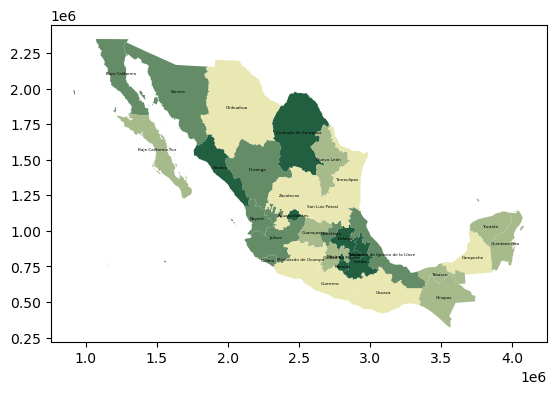

In [111]:
ax = mexico.plot(legend = True, 
            cmap = cmap_revista)

mexico.apply(lambda x: ax.annotate(text = x['NOMGEO'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=3,
                                   horizontalalignment='center', 
                                   verticalalignment='center'), axis=1)

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


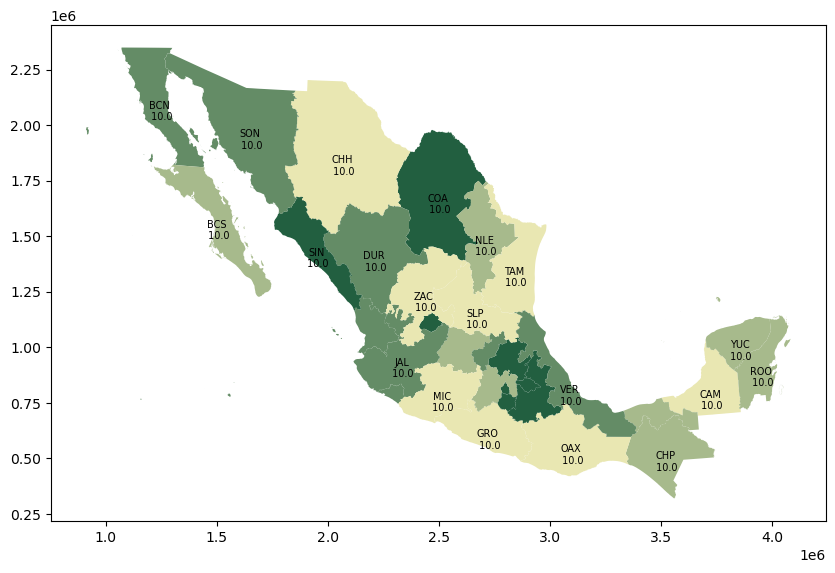

In [112]:
import pandas as pd
Abreviatura = pd.read_excel("..\\raw_data\\Abreviaturas.xlsx")
mexico_abr = list(Abreviatura['Abreviatura'])

abr = []
for t in mexico_abr:
    u = t.replace('MX-','')
    abr.append(u)
mexico = mexico_cvegeo.copy()
mexico['Abreviatura'] = abr
mexico.set_index('NOMGEO',drop=True,inplace=True)

ax = mexico.plot(figsize=(10,10), legend = True, 
            cmap = cmap_revista)
area_limit = mexico.geometry.area['Yucatán']
mini_estados = []
for estado in mexico.index:
    if mexico.geometry.area[estado] >= area_limit:
        ax.annotate(text = mexico.loc[estado,'Abreviatura'] + "\n 10.0",
                    xy=mexico.loc[estado,:].geometry.centroid.coords[0], 
                    fontsize=7,
                    horizontalalignment='center', 
                    verticalalignment='top')
    else:
        mini_estados.append([estado, mexico.loc[estado,:].geometry.centroid.coords[0]])


Hay estados muy pequeños, entonces vamos a agregar flechas hacia cada estado. 

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


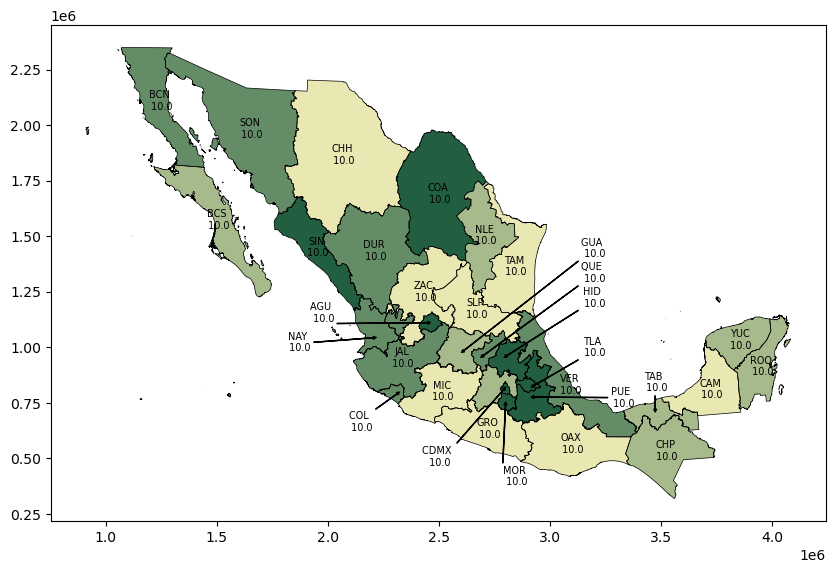

In [113]:
def arrow(text, position, text_position):
    ax.annotate(text, xy=position, xytext=text_position,
                arrowprops=dict(facecolor='k', width=0.1, headwidth=2, headlength = 2),
                ha='center', va='center', fontsize=7,
                xycoords=ax.transAxes)
def text_block(content, pos):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=7,
                    horizontalalignment='center', 
                    verticalalignment='center')
    return pos 
    
ax = mexico.plot(figsize=(10,10), legend = True, 
            cmap = cmap_revista)
area_limit = mexico.geometry.area['Yucatán']
for estado in mexico.index:
    if mexico.geometry.area[estado] >= area_limit:
        text_block(mexico.loc[estado,'Abreviatura'] + "\n 10.0",
                   mexico.loc[estado,:].geometry.centroid.coords[0])
mexico.boundary.plot(lw=0.5, color='black', ax=ax)


_ = arrow('NAY \n 10.0',(0.42,0.37), (0.32, 0.36))
_ = arrow('COL \n 10.0',(0.45,0.26), (0.40, 0.20))
_ = arrow('AGU \n 10.0', (0.49, 0.4), (0.35, 0.42))
_ = arrow('GUA \n 10.0', (0.53, 0.34), (0.70, 0.55))
_ = arrow('QUE \n 10.0',(0.555, 0.33), (0.70, 0.50))
_ = arrow('HID \n 10.0', (0.585, 0.33), (0.70, 0.45))
_ = arrow('TLA \n 10.0', (0.62, 0.27), (0.70, 0.35))
_ = arrow('PUE \n 10.0', (0.62, 0.25), (0.738, 0.249))
_ = arrow('TAB \n 10.0', (0.78, 0.22), (0.78, 0.28))
_ = arrow('CDMX \n 10.0', (0.587, 0.27), (0.50, 0.13))
_ = arrow('MOR \n 10.0', (0.587, 0.24), (0.60, 0.09))

Ahora, llenaremos los datos. Consulte la carpeta download, en la parte de ENCIG para los detalles. 

In [114]:
import pandas as pd

data = pd.read_excel("..\\tidy_data\\Revista\\MuchaAlgoConfianza.xlsx")
data.columns = ['NOMGEO',data.columns[1], data.columns[2]]
data.iloc[15,0] = 'México'
data

,NOMGEO,Gobierno Federal,Gobierno Estatal
0,Estados Unidos Mexicanos,54.1,45.1
1,Aguascalientes,52.2,47.1
2,Baja California,46.4,37.0
3,Baja California Sur,44.3,37.9
4,Campeche,71.0,58.2
5,Coahuila de Zaragoza,68.7,58.8
6,Colima,64.0,42.9
7,Chiapas,60.0,52.0
8,Chihuahua,42.8,43.1
9,Ciudad de México,49.1,48.2


Retomando la tabla base. 

In [115]:
mexico_conf = mexico_cvegeo.merge(data, on = 'NOMGEO', how = 'right')

mexico_conf.iloc[0,:] = ['00','00','Estados Unidos Mexicanos', None, 54.1, 45.1]
mexico_conf['Abreviatura'] = ['...'] + abr
mexico_conf.set_index('NOMGEO', drop=True, inplace=True)
mexico_save = mexico_conf.copy()
mexico_conf = mexico_conf[['Abreviatura','geometry','Gobierno Federal','Gobierno Estatal']]
mexico_conf

,Abreviatura,geometry,Gobierno Federal,Gobierno Estatal
NOMGEO,,,,
Estados Unidos Mexicanos,...,None,54.1,45.1
Aguascalientes,AGU,"POLYGON ((2469550.852 1159302.643, 2469738.209...",52.2,47.1
Baja California,BCN,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",46.4,37.0
Baja California Sur,BCS,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",44.3,37.9
Campeche,CAM,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",71.0,58.2
Coahuila de Zaragoza,COA,"POLYGON ((2469501.165 1978862.429, 2469539.651...",68.7,58.8
Colima,COL,"MULTIPOLYGON (((1157633.318 768573.525, 115772...",64.0,42.9
Chiapas,CHP,"POLYGON ((3558179.782 698365.650, 3558487.689 ...",60.0,52.0
Chihuahua,CHH,"POLYGON ((1915797.897 2202988.590, 1916038.390...",42.8,43.1


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


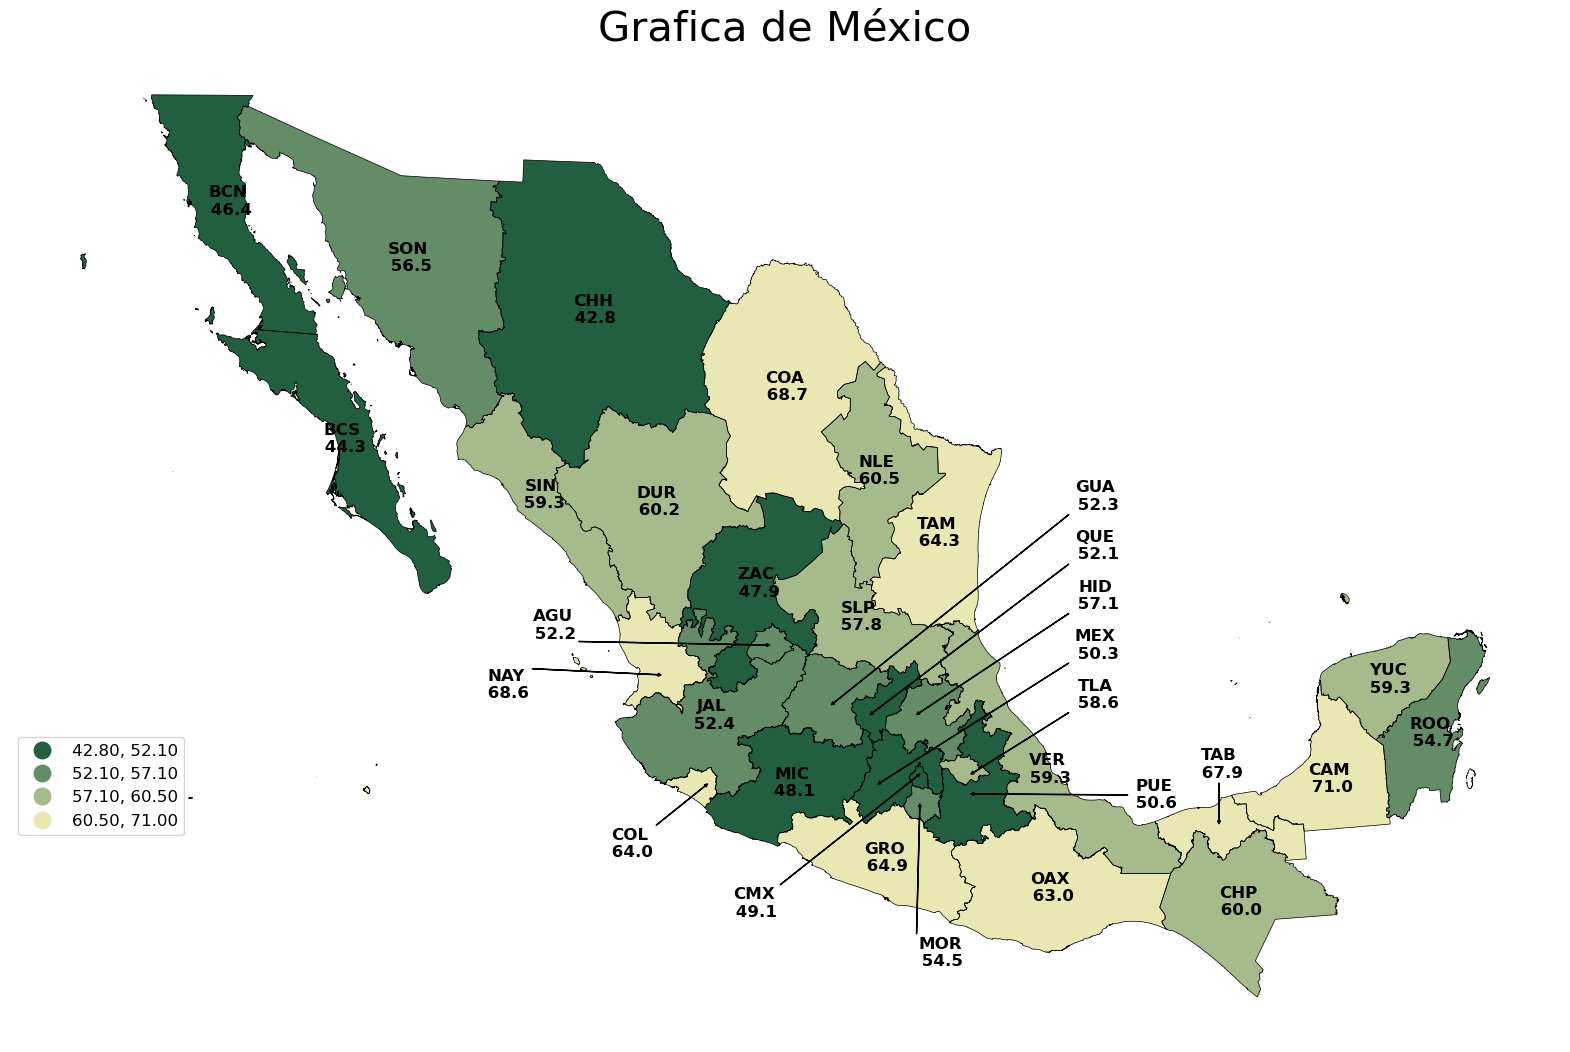

In [116]:
def arrow(text, position, text_position, ax):
    ax.annotate(text, xy=position, xytext=text_position,
                arrowprops=dict(facecolor='k', width=0.1, headwidth=2, headlength = 2),
                ha='center', va='center', fontsize=12,
                xycoords=ax.transAxes, weight = 'bold')
    return text_position

def text_block(content, pos, ax):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=12,
                    horizontalalignment='center', 
                    verticalalignment='center',
                    weight = 'bold')
    return pos 

arrow_positions = [(0.490, 0.400), (0.450, 0.260), (0.587, 0.270), 
                   (0.530, 0.340), (0.585, 0.330), (0.560, 0.260), 
                   (0.587, 0.240), (0.420, 0.370), (0.620, 0.250),
                   (0.555, 0.330), (0.780, 0.220), (0.620, 0.270)]
texti_positions = [(0.350, 0.420), (0.400, 0.200), (0.480, 0.140),
                   (0.700, 0.550), (0.700, 0.450), (0.700, 0.400),
                   (0.600, 0.090), (0.320, 0.360), (0.738, 0.249),
                   (0.700, 0.500), (0.780, 0.280), (0.700, 0.350)]



ax = mexico_conf.plot('Gobierno Federal', figsize=(20,15), cmap = cmap_revista,
                  legend=True, scheme = 'quantiles',k = 4,
                  legend_kwds={'loc':'lower left',
                               'bbox_to_anchor':(0, .2),
                               'markerscale':1.29, 
                               'title_fontsize':'large', 
                               'fontsize':'large'})
mexico_conf.boundary.plot(lw=0.5, color='black', ax=ax)
ax.set_axis_off()
ax.set_title('Grafica de México', fontsize = 30)
area_limit = mexico.geometry.area['Yucatán']
mini = 0
for estado in mexico_conf.index:
    if estado == 'Estados Unidos Mexicanos':
        continue
    if mexico_conf.geometry.area[estado] >= area_limit:
        text_block(mexico_conf.loc[estado,'Abreviatura'] + f"\n {mexico_conf.loc[estado,'Gobierno Federal']}",
                   mexico_conf.loc[estado,:].geometry.centroid.coords[0], ax=ax)
    else:
        _ = arrow(mexico_conf.loc[estado,'Abreviatura'] + f"\n {mexico_conf.loc[estado,'Gobierno Federal']}",
                  arrow_positions[mini], texti_positions[mini],ax = ax)    
    # Por esto pedimos la posición de regreso. :)
        mini +=1

plt.savefig('Mexico.png')

El mapa estaría terminado, sin embargo queremos que sea iguala al de la foto. Entonces, aun faltan ciertos detalles. 

In [117]:
interval_blocks = [42.8, 52.0, 57.0, 62.9, 71.0]
interval_blocks_est = [33.7, 39.4, 47.4, 52.7, 60.6]
def interval_names(blocks: list):
    names = []
    for i in range(len(blocks) - 1):
        if i == 0:
            y = f'[{blocks[i]},{blocks[i + 1]}]'
        else:
            y = f'[{round(blocks[i] + 0.1, 1)},{blocks[i + 1]}]'
        names.append(y)
    return names
    
def loc_interval(x, blocks, **kwargs):
    name_bool = kwargs.get('named', None)
    labels = kwargs.get('names',None)
    l = len(blocks)
    block = -1
    if name_bool:
        if len(labels) != (len(blocks) - 1):
            print('Fallo con Nombres')
        cat_names = {i:labels[i] for i in range(l - 1)}
        for i in range(l - 1):
            if blocks[i] <=x < blocks[i + 1]:
                block = cat_names[i]
            if x == blocks[-1]:
                block = cat_names[i]
        return block
    for i in range(l - 1):
        if blocks[i] <= x < blocks[i + 1]:
            block = i
            
        if x == blocks[-1]:
            block = i
    return block

def loc_for_list(y : list, blocks, **kwargs):
    loc_id = [loc_interval(xi, blocks, **kwargs) for xi in y]
    return loc_id

mexico_conf['Conf-Cat'] = loc_for_list(
    list(mexico_conf['Gobierno Federal']),
    interval_blocks, 
    named = True, 
    names = interval_names(interval_blocks))
mexico_conf['Conf-Cat-GE'] = loc_for_list(
    list(mexico_conf['Gobierno Estatal']),
    interval_blocks_est, 
    named = True, 
    names = interval_names(interval_blocks_est))


Ahora, usando la versión categoricas partimos para terminar el mapa. 

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


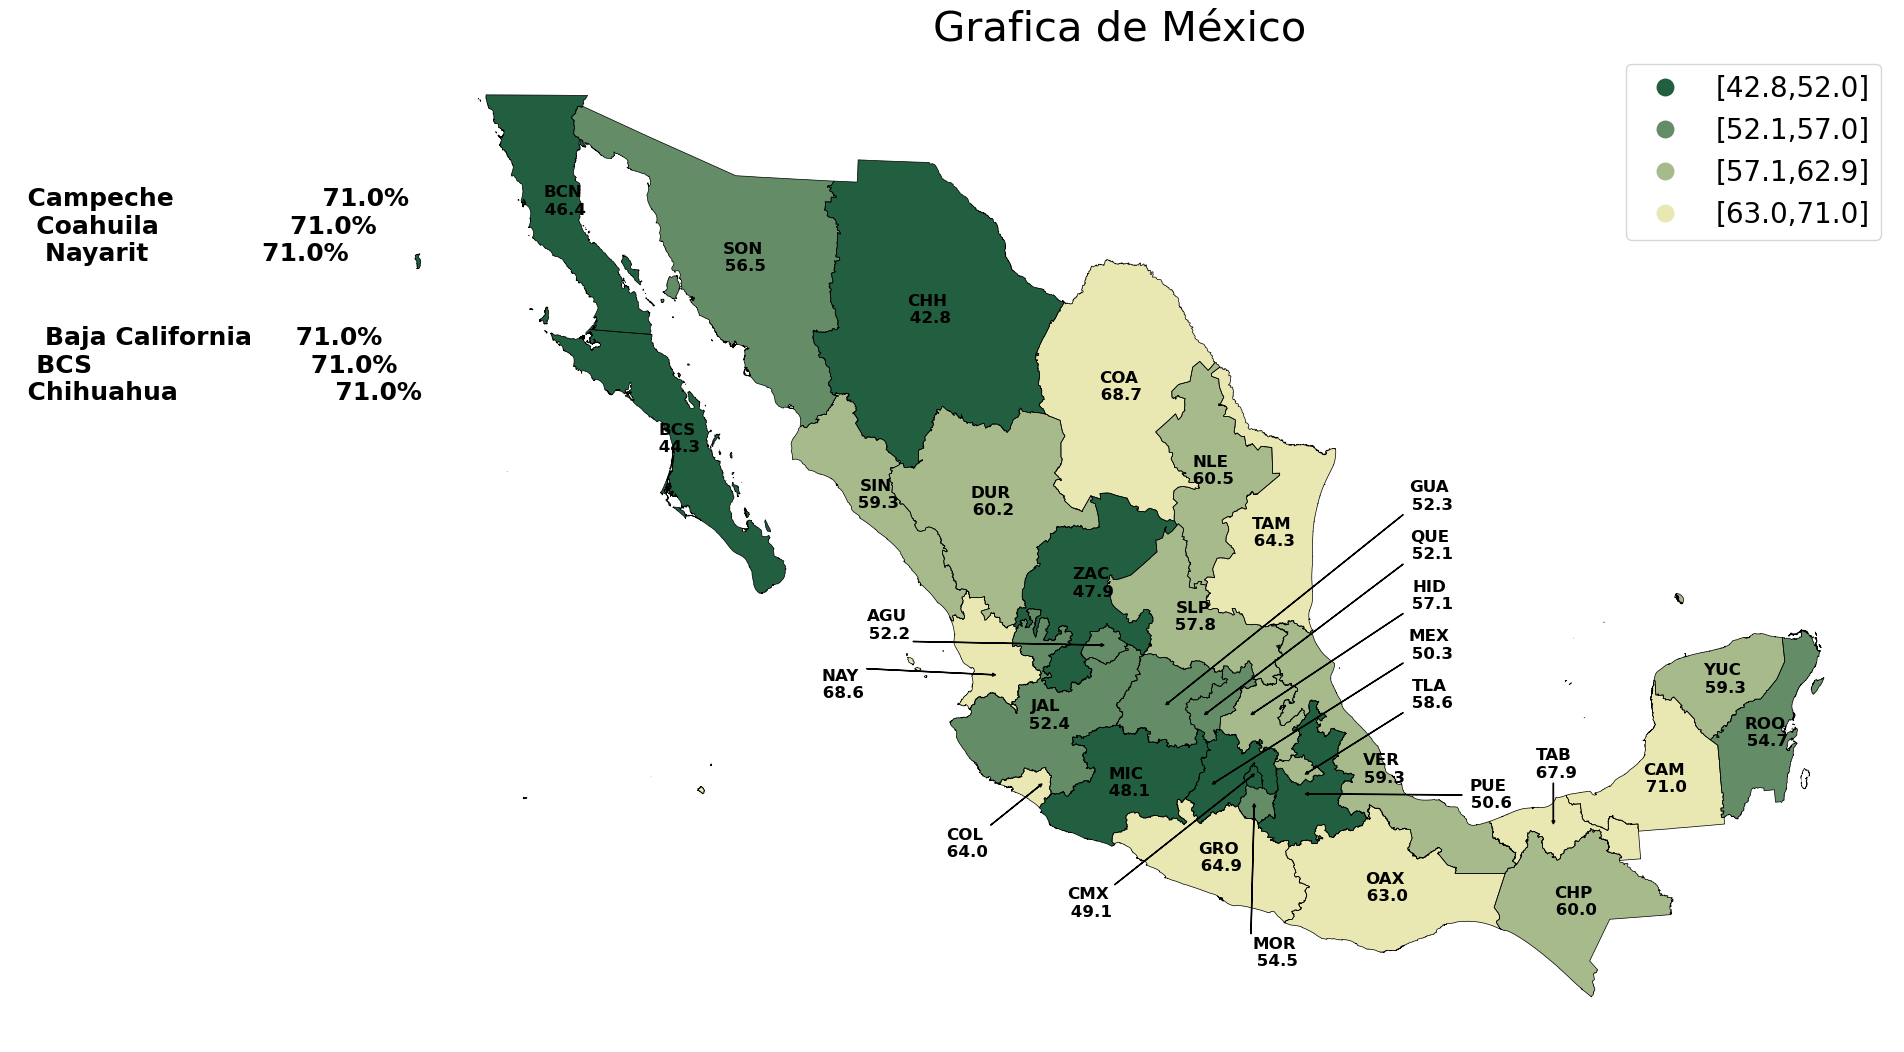

In [118]:
arrow_positions = [(0.490, 0.400), (0.450, 0.260), (0.587, 0.270), 
                   (0.530, 0.340), (0.585, 0.330), (0.560, 0.260), 
                   (0.587, 0.240), (0.420, 0.370), (0.620, 0.250),
                   (0.555, 0.330), (0.780, 0.220), (0.620, 0.270)]
texti_positions = [(0.350, 0.420), (0.400, 0.200), (0.480, 0.140),
                   (0.700, 0.550), (0.700, 0.450), (0.700, 0.400),
                   (0.600, 0.090), (0.320, 0.360), (0.738, 0.249),
                   (0.700, 0.500), (0.780, 0.280), (0.700, 0.350)]

# Por esto pedimos la posición de regreso. :)


ax = mexico_conf.plot('Conf-Cat', figsize=(20,15), cmap = cmap_revista,
                  legend=True, categorical = True, legend_kwds = {
                      'fontsize': 20,
                      'markerscale':1.29
                  })

mexico_conf.boundary.plot(lw=0.5, color='black', ax=ax)
ax.set_axis_off()
ax.set_title('Grafica de México', fontsize = 30)

data_text = "  Campeche                 71.0% \n   Coahuila               71.0% \n    Nayarit             71.0% \n\n\n    Baja California     71.0% \n   BCS                         71.0% \n  Chihuahua                  71.0% \n"
ax.text(x = 0, y = 1.6e6, s = data_text, fontsize = 18, weight = 'bold')
area_limit = mexico_conf.geometry.area['Yucatán']
mini = 0
for estado in mexico_conf.index:
    if estado == 'Estados Unidos Mexicanos':
        continue
    if mexico_conf.geometry.area[estado] >= area_limit:
        text_block(mexico_conf.loc[estado,'Abreviatura'] + f"\n {mexico_conf.loc[estado,'Gobierno Federal']}",
                   mexico_conf.loc[estado,:].geometry.centroid.coords[0], ax)
    else:
        _ = arrow(mexico_conf.loc[estado,'Abreviatura'] + f"\n {mexico_conf.loc[estado,'Gobierno Federal']}",
                  arrow_positions[mini], texti_positions[mini], ax)
        mini +=1

In [119]:
def order_dict_values(data: dict):
    sorted_tidy = dict(sorted(data.items(), key=lambda item:item[1]))
    ds = list(sorted_tidy.keys())
    return ds

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDepr

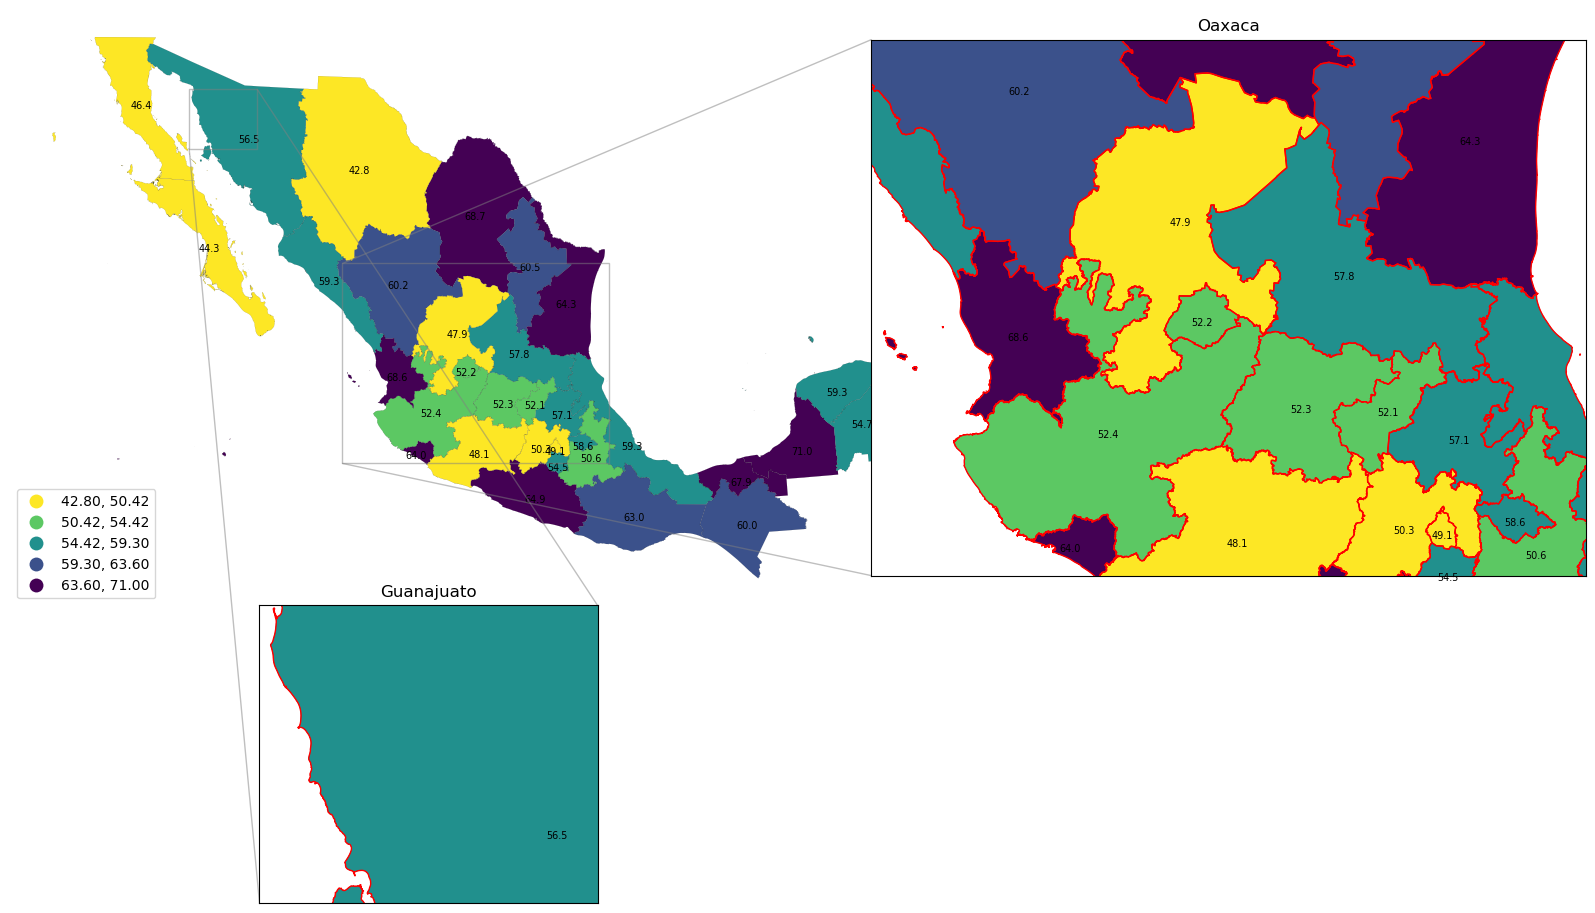

In [120]:
fig, ax = plt.subplots()


# Añade recuadro 1
axins = ax.inset_axes([0.86, 0.05, 0.9, 0.9])
# Añade recuadro 2
axins2 = ax.inset_axes([0.2, -0.5, 0.5, 0.5])

# Gráfica principal
mexico_conf.plot(column='Gobierno Federal', legend=True, ax=ax, scheme='quantiles', k=5, cmap='viridis_r', legend_kwds={'loc': 'lower left'})
mexico_conf.boundary.plot(lw=0.05, color='k', ax=ax)

# Gráfica recuadro 1
mexico_conf.plot(column='Gobierno Federal', legend=False, ax=axins, scheme='quantiles', k=5, cmap='viridis_r')
mexico_conf.boundary.plot(lw=0.25, color='k', ax=axins)
mexico_conf.boundary.plot(lw=1, color='red', ax=axins)

# Gráfica recuadro 2
mexico_conf.plot(column='Gobierno Federal', legend=False, ax=axins2, scheme='quantiles', k=5, cmap='viridis_r')
mexico_conf.boundary.plot(lw=0.25, color='k', ax=axins2)
mexico_conf.boundary.plot(lw=1, color='red', ax=axins2)

# limita área a mostrar recuadro 1 y 2
axins.set(ylabel='', xlabel='', xlim=(2e6, 3e6), ylim=(0.75e6, 1.5e6), xticks=[], yticks=[], title='Oaxaca')
axins2.set(ylabel='', xlabel='', xlim=(1425000, 1680000), ylim=(2229203-300000, 2453767-300000), xticks=[], yticks=[], title='Guanajuato')

mexico_2 = mexico_conf.iloc[1:,:]
mexico_2.apply(lambda x: ax.annotate( text = x['Gobierno Federal'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=7,
                                   horizontalalignment='center', 
                                   verticalalignment='top'), axis=1)
mexico_2.apply(lambda x: axins.annotate( text = x['Gobierno Federal'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=7,
                                   horizontalalignment='center', 
                                   verticalalignment='top'), axis=1)
mexico_2.apply(lambda x: axins2.annotate( text = x['Gobierno Federal'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=7,
                                   horizontalalignment='center', 
                                   verticalalignment='top'), axis=1)

# Elimina marco de la gráfica principal
ax.set_axis_off()
# Establece líneas de los recuadros a la gráfica principal
ax.indicate_inset_zoom(axins)
ax.indicate_inset_zoom(axins2)

# Tamaño de la gráfica final
fig.set_size_inches(12, 8)


Finalmente, la gráfica será almacenada para el resto de informaición mediante una función. 

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDepr

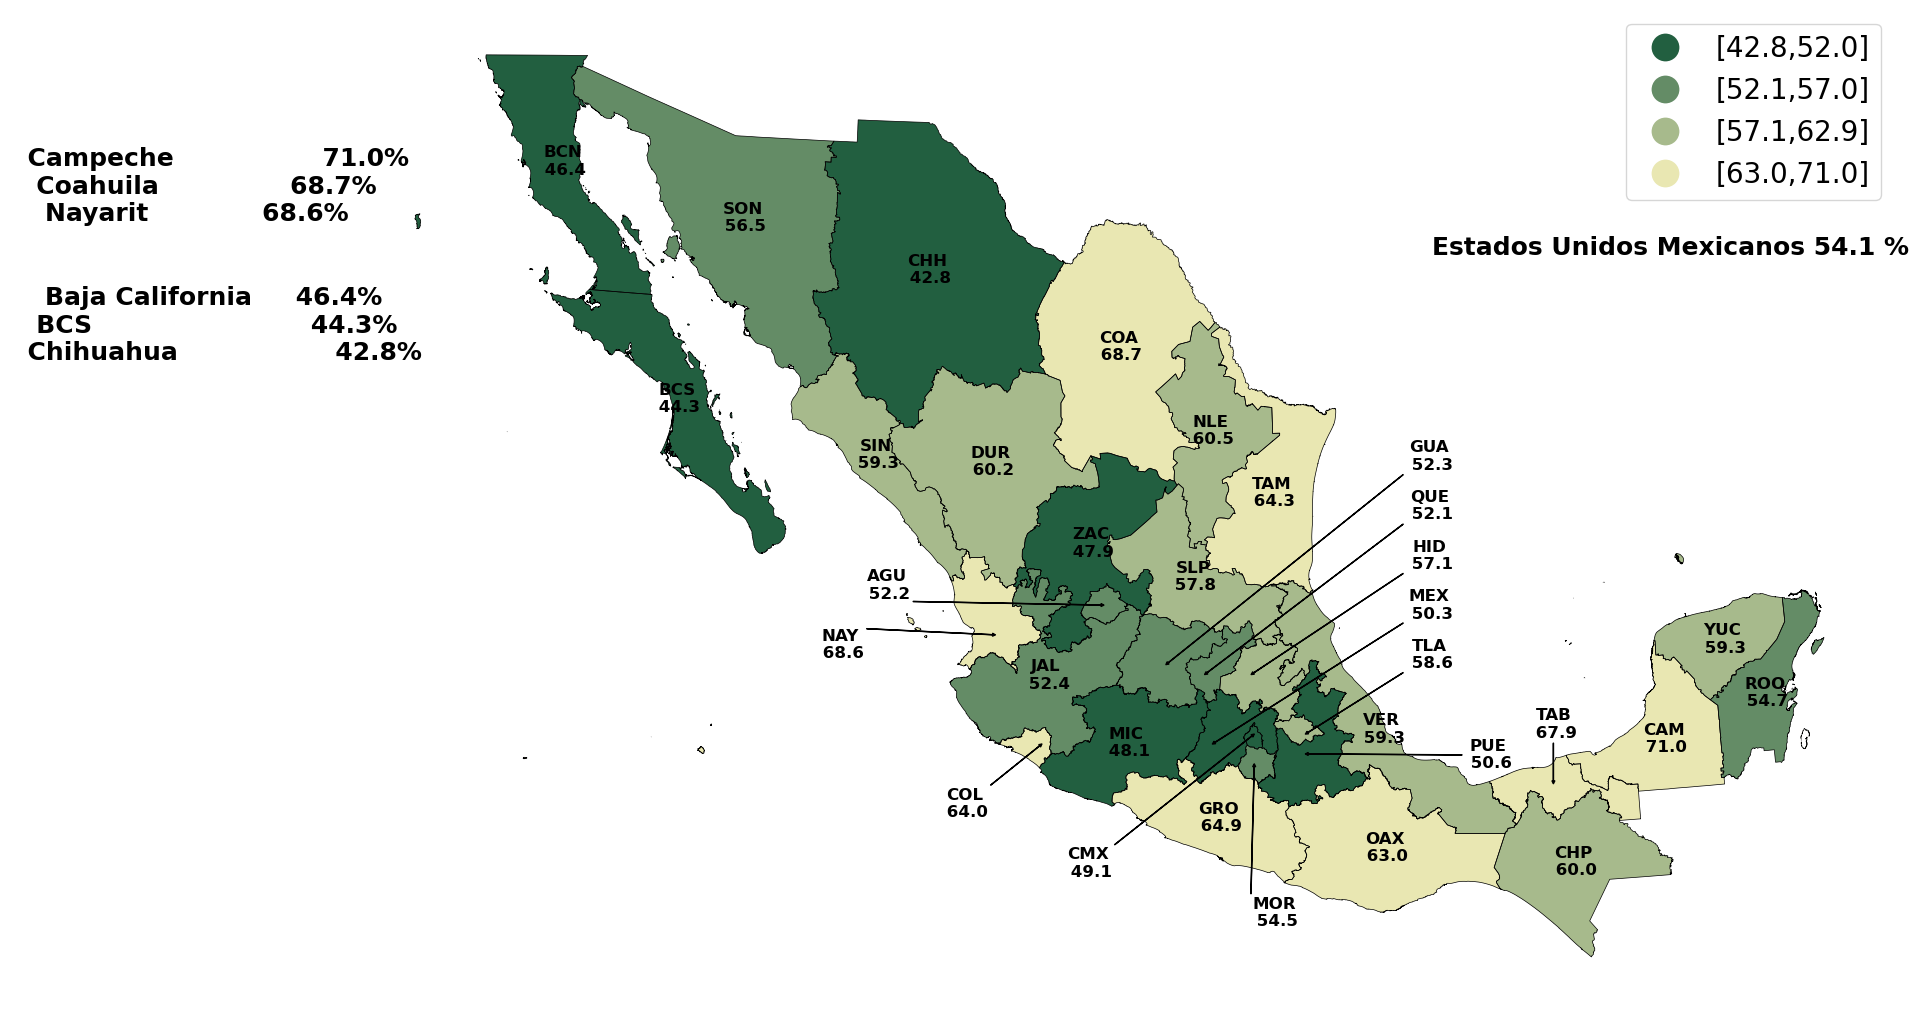

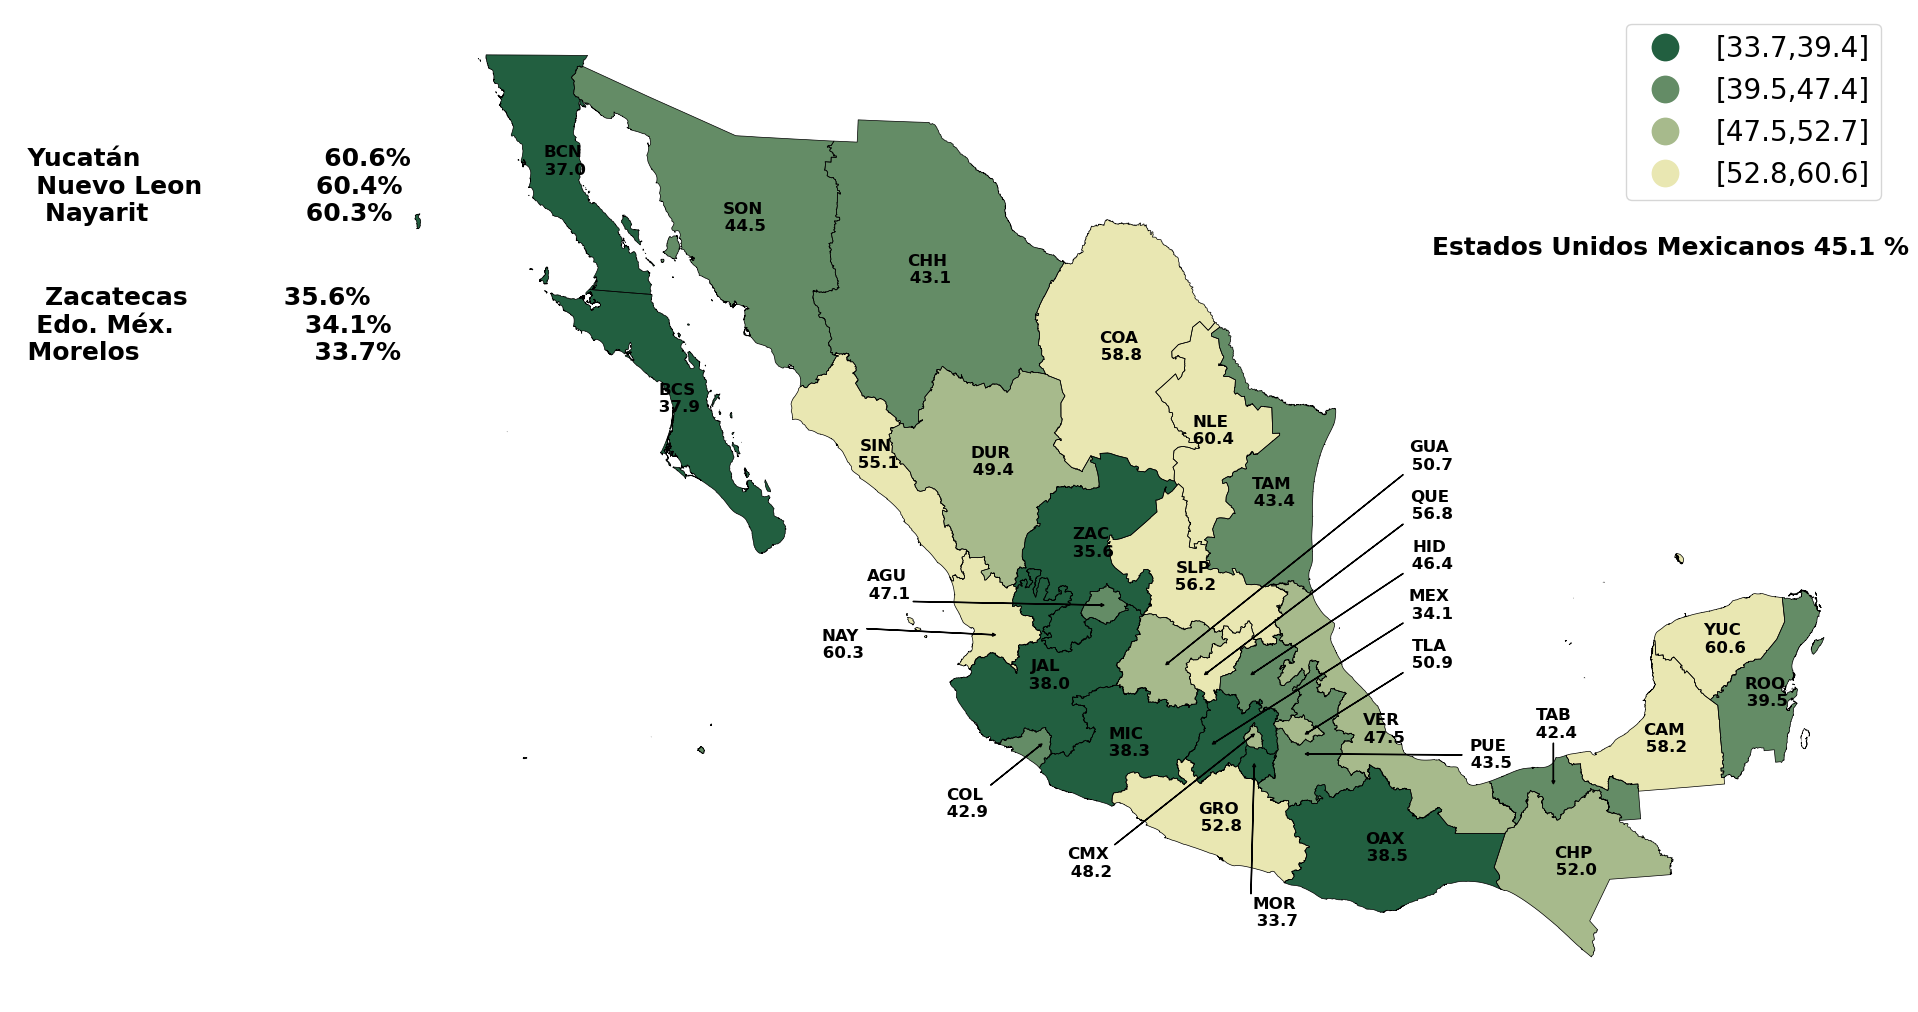

In [121]:
def mexico_map(colors: ListedColormap, col_data: str, mexico_df: gpd.GeoDataFrame, **kwargs):
    title = kwargs.get('title', None)
    if title == None:
        title = ""
    data2 = kwargs.get('ad_data',None)
    data_text = kwargs.get('ad_text', None)
    saving = kwargs.get('path',None)
    arrow_positions = [(0.490, 0.400), (0.450, 0.260), (0.587, 0.270), 
                    (0.530, 0.340), (0.585, 0.330), (0.560, 0.260), 
                    (0.587, 0.240), (0.420, 0.370), (0.620, 0.250),
                    (0.555, 0.330), (0.780, 0.220), (0.620, 0.270)]
    texti_positions = [(0.350, 0.420), (0.400, 0.200), (0.480, 0.140),
                    (0.700, 0.550), (0.700, 0.450), (0.700, 0.400),
                    (0.600, 0.090), (0.320, 0.360), (0.738, 0.249),
                    (0.700, 0.500), (0.780, 0.280), (0.700, 0.350)]
    ax = mexico_df.plot(col_data, figsize=(20,20), cmap = colors,
                    legend=True, categorical = True, legend_kwds = {
                        'fontsize': 20,
                        'markerscale':2,
                    })

    mexico_df.boundary.plot(lw=0.5, color='black', ax=ax)
    ax.set_axis_off()
    ax.set_title(title, fontsize = 30)

    ax.text(x = 0, y = 1.6e6, s = data_text, fontsize = 18, weight = 'bold')
 
    area_limit = mexico_df.geometry.area['Yucatán']
    mini = 0
    if data2 != None:
        col_data = data2
    ax.text(x = 3.2e6,
            y = 1.9e6,
            fontsize = 18,
            weight = 'bold',
            s = f'Estados Unidos Mexicanos {mexico_df.loc[mexico_df.index[0], col_data] } %')
    for estado in mexico_df.index:
        if estado == 'Estados Unidos Mexicanos':
            continue
        if mexico_df.geometry.area[estado] >= area_limit:
            text_block(mexico_df.loc[estado,'Abreviatura'] + f"\n {mexico_df.loc[estado, col_data]}",
                    mexico_df.loc[estado,:].geometry.centroid.coords[0], ax)
        else:
            _ = arrow(mexico_df.loc[estado,'Abreviatura'] + f"\n {mexico_df.loc[estado, col_data]}",
                    arrow_positions[mini], texti_positions[mini], ax)
            mini +=1
    
    if saving !=None:
        plt.savefig(saving)

text1 = "  Campeche                 71.0% \n   Coahuila               68.7% \n    Nayarit             68.6% \n\n\n    Baja California     46.4% \n   BCS                         44.3% \n  Chihuahua                  42.8% \n"
text2 = "  Yucatán                     60.6% \n   Nuevo Leon             60.4% \n    Nayarit                  60.3% \n\n\n    Zacatecas           35.6% \n   Edo. Méx.               34.1% \n  Morelos                    33.7% \n"


mexico_map(cmap_revista, 'Conf-Cat', mexico_conf, ad_data = 'Gobierno Federal', ad_text = text1, path = "conf_federal")
mexico_map(cmap_revista, 'Conf-Cat-GE', mexico_conf, ad_data = 'Gobierno Estatal',ad_text = text2, path = "conf_estatal")

## Revista1


In [229]:
import pandas as pd

data = pd.read_excel('..\\raw_data\\Tablas.xlsx', sheet_name=None)
sheets = list(data.keys())

fisdmf2022 = data[sheets[1]].copy()
fisdmf2022 = fisdmf2022.iloc[3:,1:]
fisdmf2022
fisdmf2022.columns = fisdmf2022.iloc[0,:]
fisdmf2022 = fisdmf2022.iloc[1:]
fisdmf2022.set_index('E N T I D A D E S',drop=True,inplace=True)

abr = pd.read_excel('..\\raw_data\\Abreviaturas.xlsx')
abtra = [t.replace('MX-','') for t in abr['Abreviatura'].to_list()]
new_c = ['TOTAL'] + abtra + ['ASF']

fisdmf2022['Estados*'] = new_c
fisdmf2022.set_index('Estados*',inplace=True)
fisdmf2022['ANUAL %'] = 100 * fisdmf2022['ANUAL'] / fisdmf2022.iloc[0, 0] 


fis_data = fisdmf2022[['ANUAL','ANUAL %']]
fis_data = fis_data.iloc[1:-1]
fis_data['ANUAL MDP'] = fis_data['ANUAL'] / 1e6
fis_data['ANUAL MMDP'] = fis_data['ANUAL'] / 1e9

color_test = 'orange'
cmap_test = 'viridis'

fis_data

3,ANUAL,ANUAL %,ANUAL MDP,ANUAL MMDP
Estados*,,,,
AGU,380213034,0.458707,380.213034,0.380213
BCN,622524780,0.751044,622.52478,0.622525
BCS,241962342,0.291915,241.962342,0.241962
CAM,1000666091,1.207252,1000.666091,1.000666
COA,731118970,0.882057,731.11897,0.731119
COL,421991920,0.509111,421.99192,0.421992
CHP,13089729119,15.79208,13089.729119,13.089729
CHH,1461786557,1.76357,1461.786557,1.461787
CMX,1683227289,2.030727,1683.227289,1.683227


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDepr

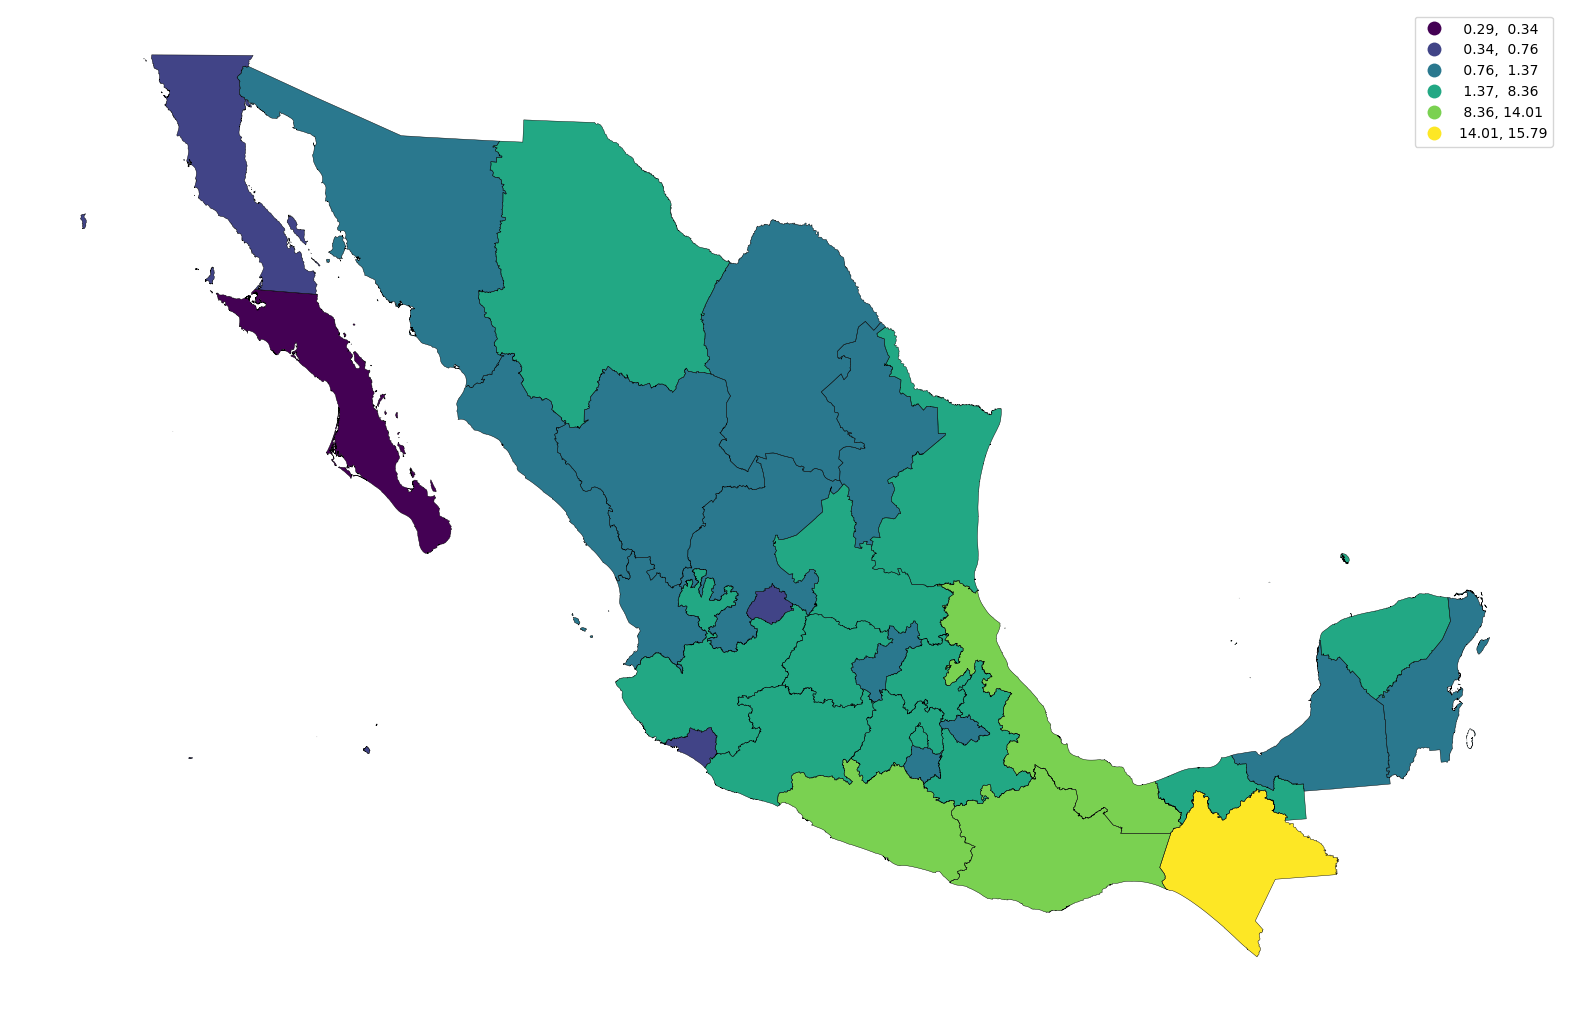

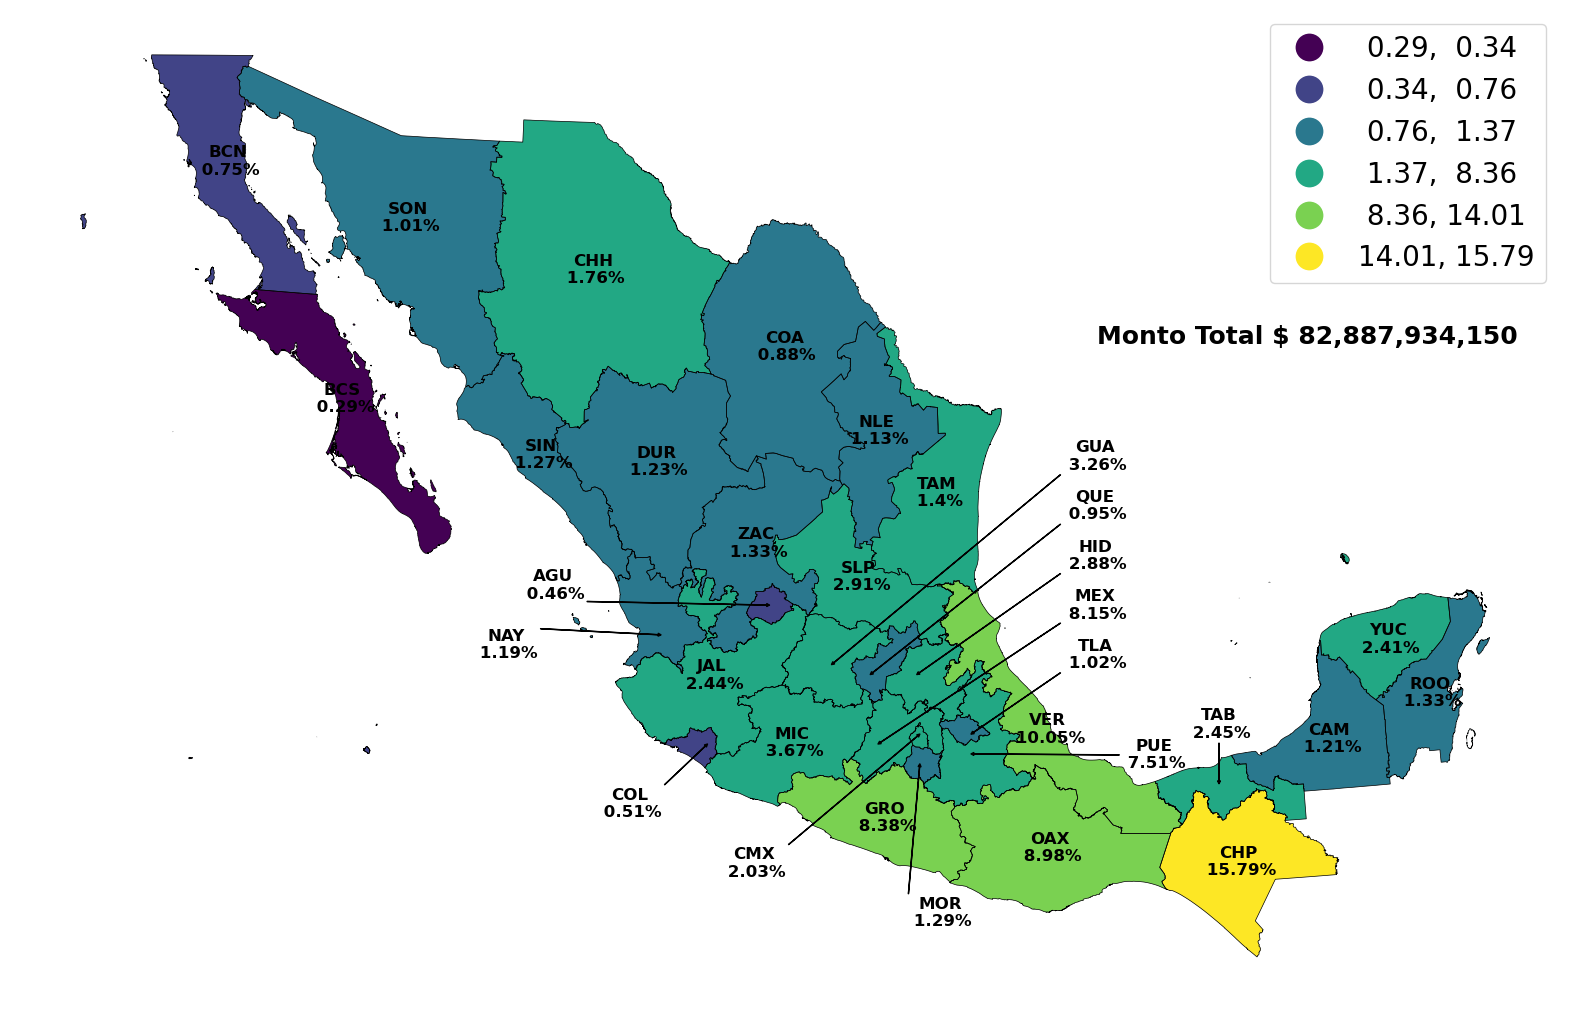

In [231]:
mexico_fis = mexico.copy()
mexico_fis.loc[:, 'FIS %'] = list(fis_data['ANUAL %'])

fismex_perc, ax = plt.subplots(figsize = (20,20))
mexico_fis.plot('FIS %', scheme = 'percentiles', cmap = cmap_test, legend=True, ax = ax,
                legend_kwds = {})
mexico_fis.boundary.plot(lw= 0.3, color = 'black', ax = ax)
ax.set_axis_off()

# fismex_abs, ax = plt.subplots()
# mexico_fis.plot('FISDMF2022',figsize = (20,20), scheme = 'percentiles', legend=True, ax = ax, 
#                 legend_kwds={'fontsize' : 8})
# ax.set_axis_off()

def mexico_map_2(colors: ListedColormap, col_data: str, mexico_df: gpd.GeoDataFrame, **kwargs):
    title = kwargs.get('title', None)
    if title == None:
        title = ""
    data2 = kwargs.get('ad_data',None)
    data_text = kwargs.get('ad_text', None)
    saving = kwargs.get('path',None)
    arrow_positions = [(0.490, 0.400), (0.450, 0.260), (0.587, 0.270), 
                    (0.530, 0.340), (0.585, 0.330), (0.560, 0.260), 
                    (0.587, 0.240), (0.420, 0.370), (0.620, 0.250),
                    (0.555, 0.330), (0.780, 0.220), (0.620, 0.270)]
    texti_positions = [(0.350, 0.420), (0.400, 0.200), (0.480, 0.140),
                    (0.700, 0.550), (0.700, 0.450), (0.700, 0.400),
                    (0.600, 0.090), (0.320, 0.360), (0.738, 0.249),
                    (0.700, 0.500), (0.780, 0.280), (0.700, 0.350)]
    mapa, ax = plt.subplots(figsize = (20,20))
    mexico_df.plot(col_data, cmap = colors, ax = ax, scheme = 'percentiles',
                    legend=True, legend_kwds = {
                        'fontsize': 20,
                        'markerscale':2,
                    })

    mexico_df.boundary.plot(lw=0.5, color='black', ax=ax)
    ax.set_axis_off()
    ax.set_title(title, fontsize = 30)

    ax.text(x = 0, y = 1.6e6, s = data_text, fontsize = 18, weight = 'bold')
 
    area_limit = mexico_df.geometry.area['Yucatán']
    mini = 0
    if data2 != None:
        col_data = data2
    ax.text(x = 3.2e6,
            y = 1.7e6,
            fontsize = 18,
            weight = 'bold',
            s = f'Monto Total $ {int(fisdmf2022.iloc[0,0]):,}')
    for estado in mexico_df.index:
        if estado == 'Estados Unidos Mexicanos':
            continue
        if mexico_df.geometry.area[estado] >= area_limit:
            text_block(mexico_df.loc[estado,'Abreviatura'] + f"\n {round(mexico_df.loc[estado, col_data],2)}%",
                    mexico_df.loc[estado,:].geometry.centroid.coords[0], ax)
        else:
            _ = arrow(mexico_df.loc[estado,'Abreviatura'] + f"\n {round(mexico_df.loc[estado, col_data],2)}%",
                    arrow_positions[mini], texti_positions[mini], ax)
            mini +=1
    
    if saving !=None:
        plt.savefig(saving)


mexico_map_2(cmap_test, 'FIS %', mexico_fis)